In [27]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
os.listdir('./data')

['DJI_fe.csv',
 'DJI_STO_20period_sma10.csv',
 '.DS_Store',
 'N225.csv',
 'DJI_modified_features - DJI.csv',
 'N225fillVOL.csv',
 'DJI_modified_sma.csv',
 'downjone5y.csv',
 'N225withoutNULL.csv',
 'stocknews',
 'dowjone1985_2019.csv',
 '.ipynb_checkpoints',
 'DJI_ema.csv',
 'DJI_denoise.csv']

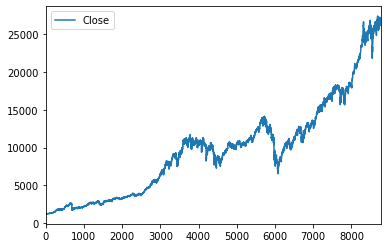

In [8]:
df = pd.read_csv('./data/DJI_fe.csv')
df.head()
df.plot(y='Close')

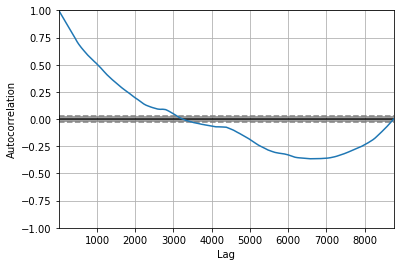

In [11]:
autocorrelation_plot(df['Close'])

In [13]:
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 8761
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -53764.125
Method:                       css-mle   S.D. of innovations            111.924
Date:                Fri, 29 Nov 2019   AIC                         107542.251
Time:                        19:13:15   BIC                         107591.797
Sample:                             1   HQIC                        107559.133
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9396      1.068      2.752      0.006       0.846       5.033
ar.L1.D.Close    -0.0443      0.011     -4.148      0.000      -0.065      -0.023
ar.L2.D.Close    -0.0358      0.011     

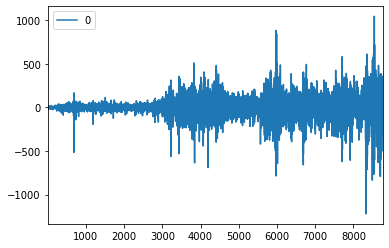

In [14]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

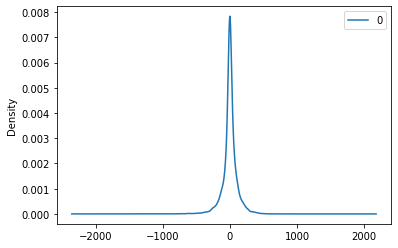

                 0
count  8761.000000
mean     -0.000458
std     111.930078
min   -1221.470649
25%     -32.441978
50%       0.554708
75%      39.241568
max    1045.002518


In [17]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

 66%|██████▌   | 1155/1753 [07:58<03:50,  2.59it/s]/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|██████████| 1753/1753 [12:20<00:00,  2.37it/s]

Test MSE : 27791.011


NameError: name 'prediction' is not defined

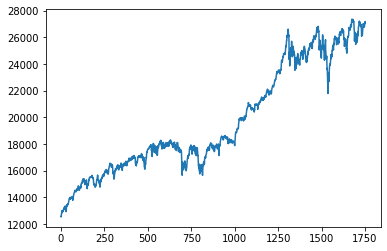

In [28]:
X = df['Close'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
hist = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
    model = ARIMA(hist, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    hist.append(obs)
#     print('predicted=%f, expected=%f' % (y_hat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE : %.3f' % error )


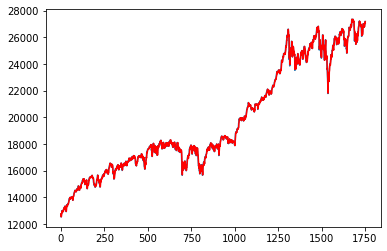

In [30]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()